In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("car_evaluation_with.csv")
df

,vhigh,vhigh.1,2,2.1,small,med,unacc
0,vhigh,vhigh,2,2,small,high,unacc
1,vhigh,vhigh,2,2,med,low,unacc
2,vhigh,vhigh,2,2,med,med,unacc
3,vhigh,vhigh,2,2,med,high,unacc
4,vhigh,vhigh,2,2,big,low,unacc
...,...,...,...,...,...,...,...
1721,low,low,5,5,med,med,good
1722,low,low,5,5,med,high,vgood
1723,low,low,5,5,big,low,unacc
1724,low,low,5,5,big,med,good


In [15]:
new_column_names = [
    "buying",
    "maintenance",
    "doors",
    "persons",
    "lug_storage",
    "safety",
    "target"
]

# Assign new column names to the DataFrame
df.columns = new_column_names

In [16]:
df

,buying,maintenance,doors,persons,lug_storage,safety,target
0,vhigh,vhigh,2,2,small,high,unacc
1,vhigh,vhigh,2,2,med,low,unacc
2,vhigh,vhigh,2,2,med,med,unacc
3,vhigh,vhigh,2,2,med,high,unacc
4,vhigh,vhigh,2,2,big,low,unacc
...,...,...,...,...,...,...,...
1721,low,low,5,5,med,med,good
1722,low,low,5,5,med,high,vgood
1723,low,low,5,5,big,low,unacc
1724,low,low,5,5,big,med,good


In [17]:
df.isnull().sum()

buying         0
maintenance    0
doors          0
persons        0
lug_storage    0
safety         0
target         0
dtype: int64

In [18]:
df["buying"] = df["buying"].map({"low" : 0, "med" : 1, "high" : 2, "vhigh" : 3})
df["maintenance"] = df["maintenance"].map({"low" : 0, "med" : 1, "high" : 2, "vhigh" : 2})
df["lug_storage"] = df["lug_storage"].map({"small" : 0, "med" : 1, "big" : 2})
df["safety"] = df["safety"].map({"low" : 0, "med" : 1, "high" : 2})
df["target"] = df["target"].map({"unacc" : 0, "acc" : 1,"good" : 2, "vgood" : 3})

df

,buying,maintenance,doors,persons,lug_storage,safety,target
0,3,2,2,2,0,2,0
1,3,2,2,2,1,0,0
2,3,2,2,2,1,1,0
3,3,2,2,2,1,2,0
4,3,2,2,2,2,0,0
...,...,...,...,...,...,...,...
1721,0,0,5,5,1,1,2
1722,0,0,5,5,1,2,3
1723,0,0,5,5,2,0,0
1724,0,0,5,5,2,1,2


In [19]:
df.isnull().sum()

buying         0
maintenance    0
doors          0
persons        0
lug_storage    0
safety         0
target         0
dtype: int64

<Axes: xlabel='target', ylabel='persons'>

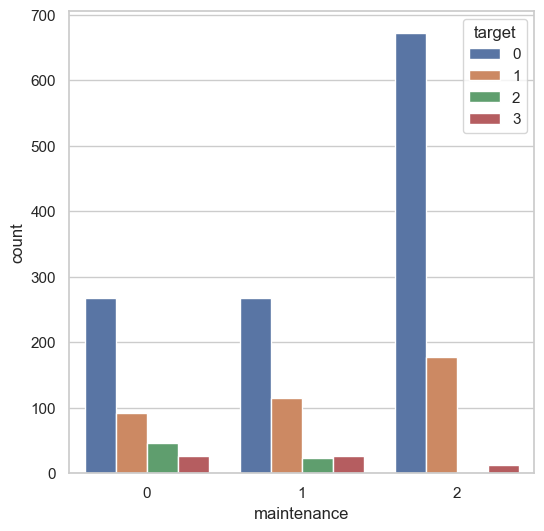

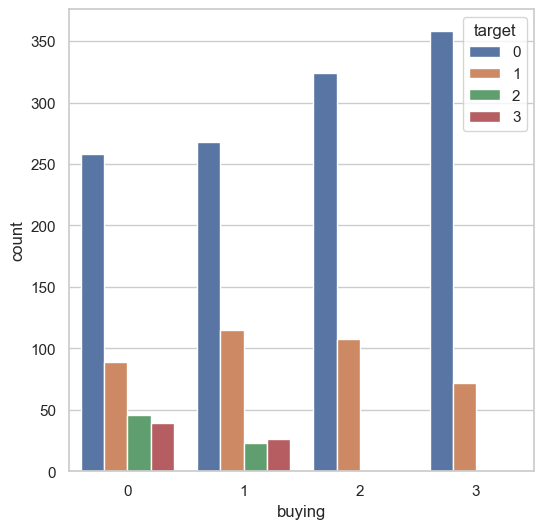

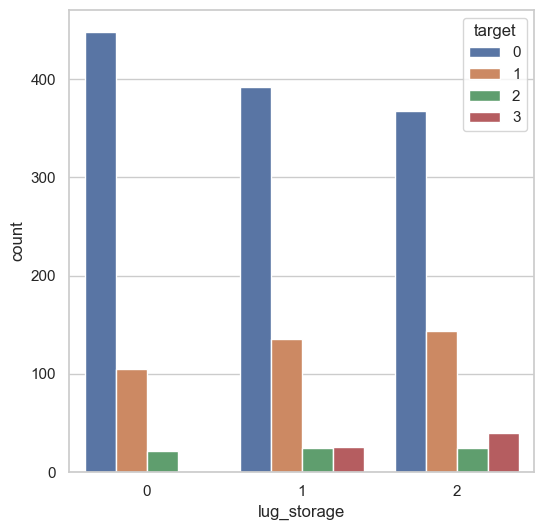

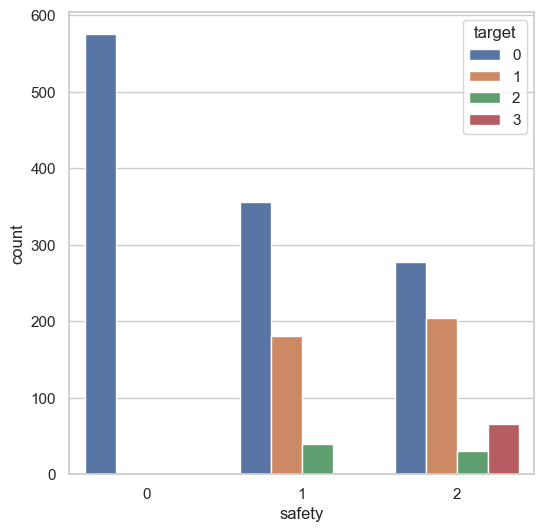

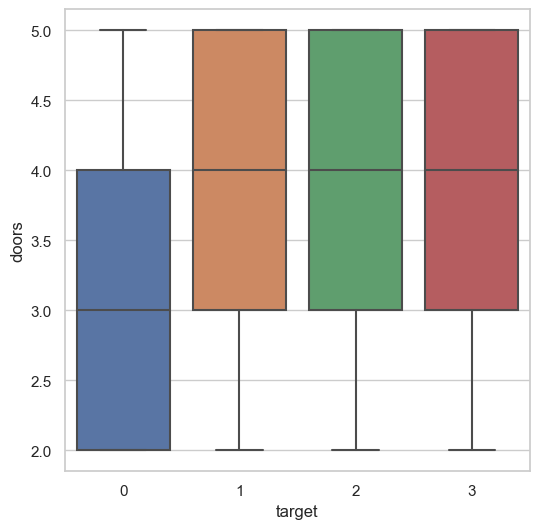

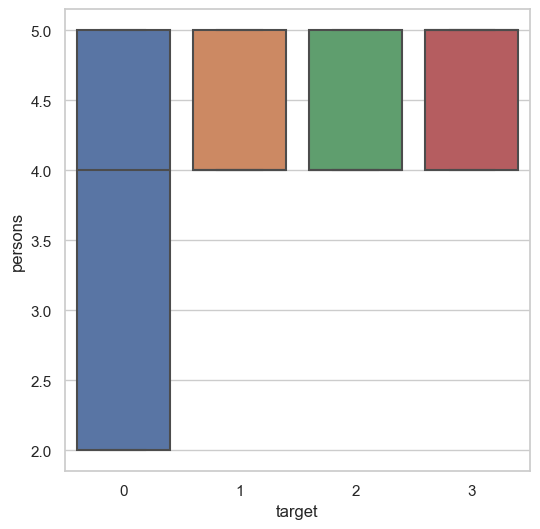

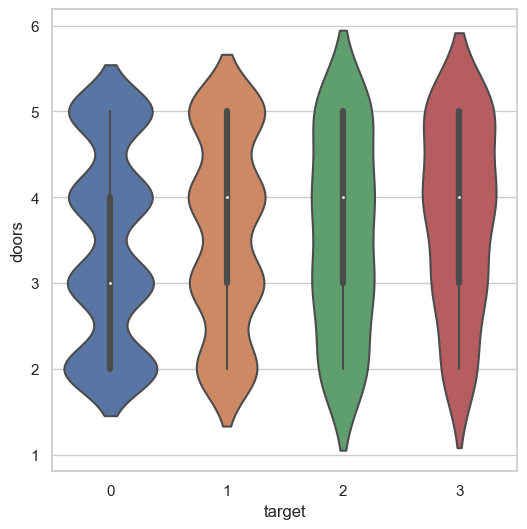

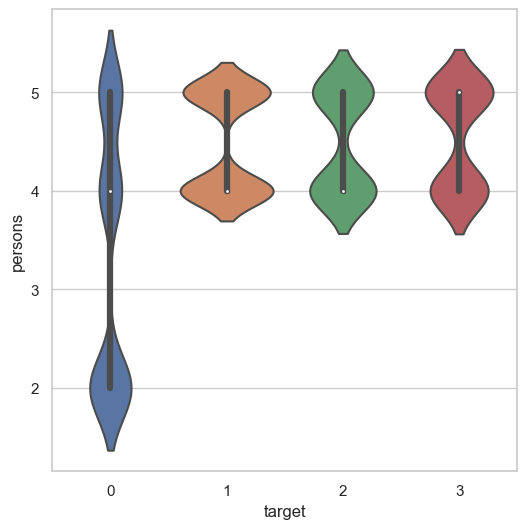

In [21]:
sns.set(style = "whitegrid")

# Countplot for categorical variables
plt.figure(figsize = (6, 6))
sns.countplot(x = "maintenance", data = df, hue = "target")

plt.figure(figsize = (6, 6))
sns.countplot(x = "buying", data = df, hue = "target")

plt.figure(figsize = (6, 6))
sns.countplot(x = "lug_storage", data = df, hue = "target")

plt.figure(figsize = (6, 6))
sns.countplot(x = "safety", data = df, hue = "target")

plt.figure(figsize = (6, 6))
sns.boxplot(x = "target", y = "doors", data = df)

plt.figure(figsize = (6, 6))
sns.boxplot(x = "target", y = "persons", data = df)

plt.figure(figsize = (6, 6))
sns.violinplot(x = "target", y = "doors", data = df)

plt.figure(figsize = (6, 6))
sns.violinplot(x = "target", y = "persons", data = df)

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier

# Create feature matrix X and target vector y
x = df.drop(columns = ["target"])
y = df["target"]

# Perform train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    "max_depth" : [3, 5, 7],
    "learning_rate" : [0.1, 0.01, 0.001],
    "n_estimators" : [100, 200, 300]
}

# Grid Search CV for xgb_classifier
xgb_grid_search = GridSearchCV(estimator = xgb_classifier, param_grid = param_grid, cv = 5, scoring = 'accuracy')

xgb_grid_search.fit(x_train, y_train)

# Get best parameters for XGBoost Classifier
best_params = xgb_grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


Please explain "stratify" parameter

No problem! The `stratify` parameter in the `train_test_split` function is used for stratified sampling during the data split. Stratified sampling ensures that the distribution of the target variable is approximately the same in both the training and testing datasets as it is in the original dataset.

Here's how it works:

When you set `stratify` to a variable (usually the target variable), the `train_test_split` function will maintain the proportion of classes in that variable while splitting the data. This is particularly useful when dealing with imbalanced datasets where one class may be underrepresented.

Here's an example:

```python
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load an example dataset (Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split the data with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
```

In this example, `stratify=y` ensures that the proportion of different classes in the `y` variable (target variable) is preserved in both the training and testing datasets. This is beneficial when training machine learning models to prevent biased results due to class imbalances.

Keep in mind that not all datasets require stratified sampling, but it can be crucial in scenarios where maintaining class proportions is important for the model's performance evaluation.

I am confused with this line:
"Stratified sampling ensures that the distribution of the target variable is approximately the same in both the training and testing datasets as it is in the original dataset."

Certainly, let me clarify that statement:

In a dataset, especially when dealing with classification problems, you have a target variable (often denoted as `y`) that represents the labels or classes you want your machine learning model to predict. The goal of the model is to learn patterns from the features (`X`) to make accurate predictions on unseen data.

Now, when you split your dataset into a training set and a testing set using something like `train_test_split` in scikit-learn, you want to ensure that the distribution of classes in the target variable remains similar in both sets. If your original dataset has, for instance, 80% of samples from class A and 20% from class B, you want to maintain a similar distribution in both the training and testing sets.

Here's why this matters:

1. **Representativeness:** If your testing set doesn't represent the class distribution of the original dataset, your model may not generalize well to unseen data. It might perform well on the training set but poorly on new, real-world data.

2. **Imbalanced Classes:** In cases where one class is much rarer than the others (class imbalance), ensuring a proportional representation in both sets is crucial. Without stratified sampling, you might end up with a testing set that lacks examples of the rare class, leading to biased performance metrics.

By using `stratify=y` in `train_test_split`, you instruct the function to split the data while maintaining the class distribution in the target variable. This helps ensure that the model sees a diverse range of examples during training and testing, improving its ability to generalize to different scenarios.

Classfication Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       242
           1       0.83      0.87      0.85        77
           2       1.00      1.00      1.00        14
           3       0.89      0.62      0.73        13

    accuracy                           0.93       346
   macro avg       0.92      0.86      0.88       346
weighted avg       0.93      0.93      0.93       346



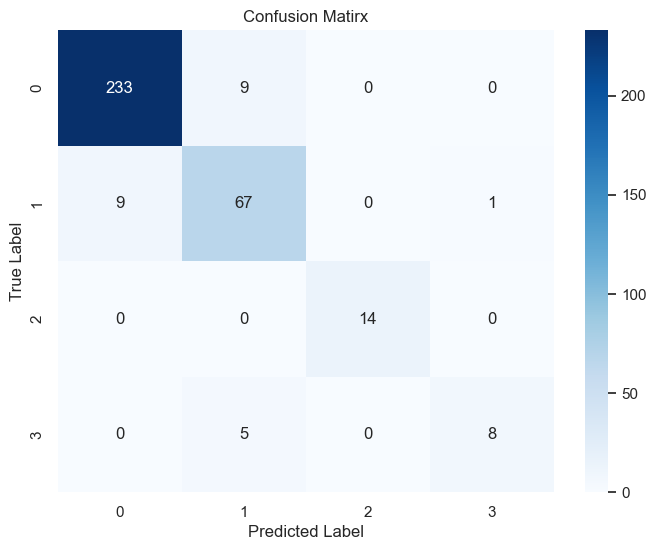

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# Preidct on the test data
y_pred = xgb_grid_search.predict(x_test)

# Print Classification report
print("Classfication Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matirx
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matirx")
plt.show()